In [9]:
import numpy as np
from numpy import pi
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-04-26 20:21:27,432: Credentials are already in use. The existing account in the session will be replaced.


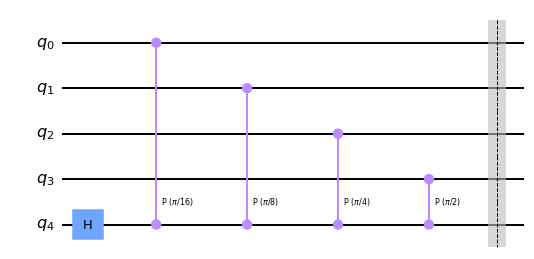

In [10]:
"""Demo of a 5-qubit Quantum Fourier Transform"""
# Create a 5 qubit circuit
circuit = QuantumCircuit(5)

circuit.h(4)
circuit.cp(pi/16, 4, 0)
circuit.cp(pi/8, 4, 1)
circuit.cp(pi/4, 4, 2)
circuit.cp(pi/2, 4, 3)
circuit.barrier()
circuit.draw()

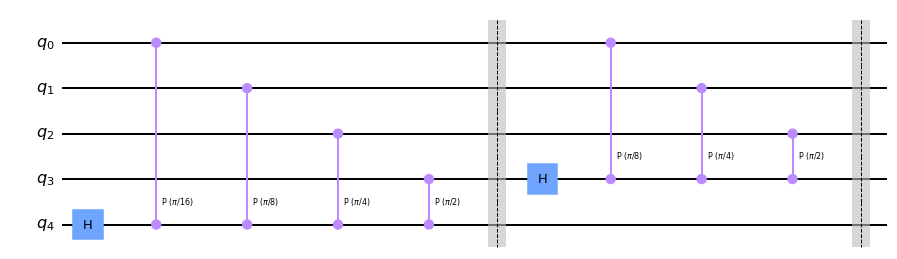

In [11]:
circuit.h(3)
circuit.cp(pi/8, 3, 0)
circuit.cp(pi/4, 3, 1)
circuit.cp(pi/2, 3, 2)
circuit.barrier()
circuit.draw()

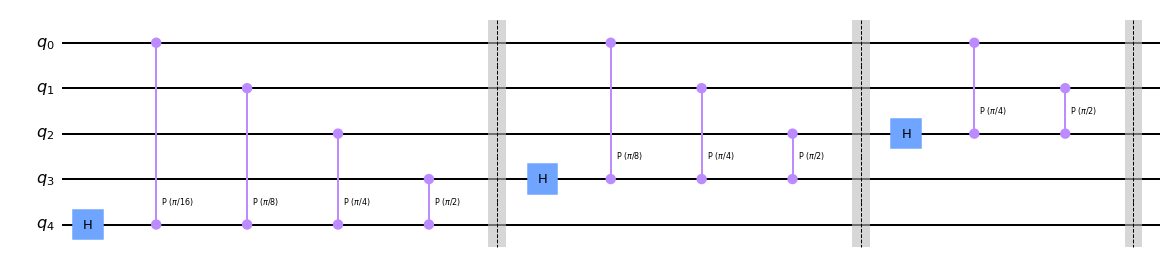

In [12]:
circuit.h(2)
circuit.cp(pi/4, 2, 0)
circuit.cp(pi/2, 2, 1)
circuit.barrier()
circuit.draw()

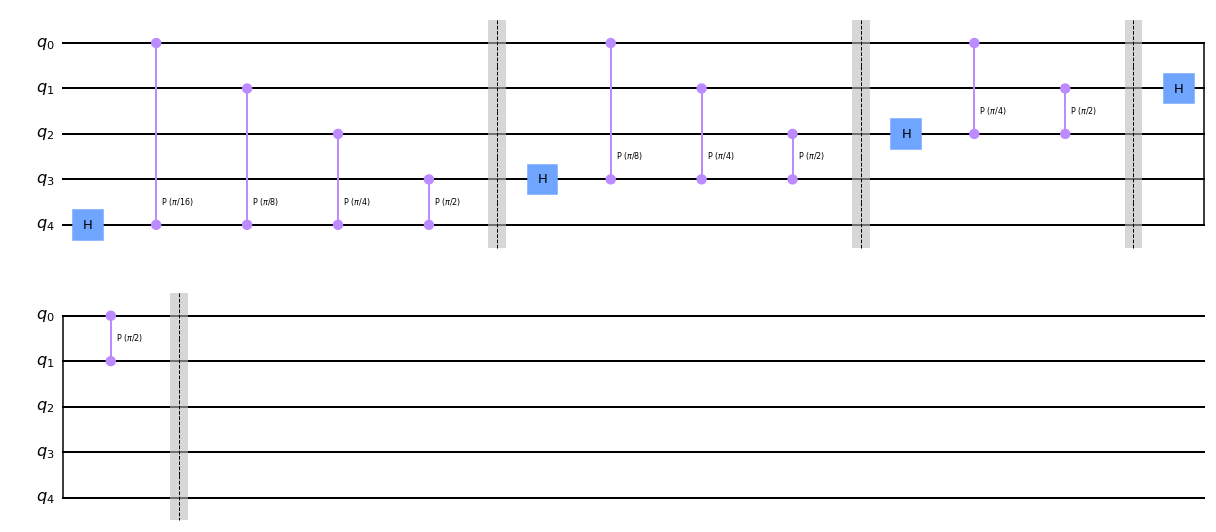

In [13]:
circuit.h(1)
circuit.cp(pi/2, 1, 0)
circuit.barrier()
circuit.draw()

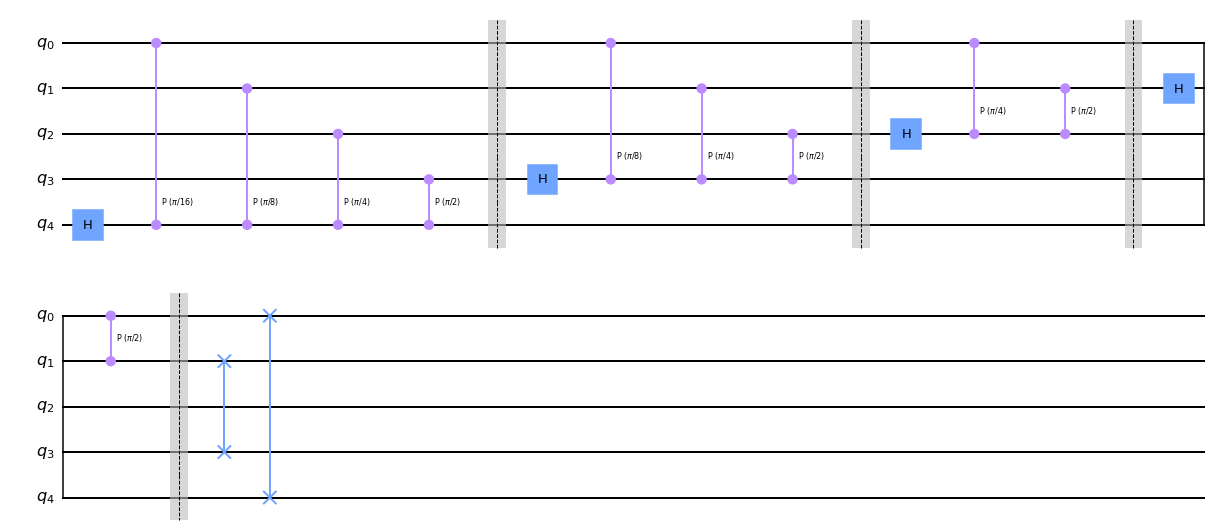

In [14]:
# Apply the swaps and measure
circuit.swap(1, 3)
circuit.swap(0, 4)
# circuit.measure_all() # can't use measure with unitary matrix
circuit.draw()

In [15]:
# View the unitary matrix
simulator = Aer.get_backend('unitary_simulator')
unitary_matrix = execute(circuit, simulator).result().get_unitary()
print('unitary_matrix', np.around(unitary_matrix, 2)) # round floating points values
print('matrix size: ', unitary_matrix.shape)

unitary_matrix [[ 0.25+0.j    0.  +0.j    0.25-0.j   ...  0.  +0.j    0.25-0.j
   0.  +0.j  ]
 [ 0.25+0.j    0.  +0.j    0.23+0.1j  ...  0.  +0.j    0.23-0.1j
   0.  +0.j  ]
 [ 0.25+0.j    0.  +0.j    0.18+0.18j ...  0.  +0.j    0.18-0.18j
   0.  +0.j  ]
 ...
 [ 0.  +0.j   -0.21+0.14j  0.  +0.j   ...  0.05-0.25j  0.  +0.j
  -0.21-0.14j]
 [ 0.  +0.j   -0.23+0.1j   0.  +0.j   ... -0.1 -0.23j  0.  +0.j
  -0.23-0.1j ]
 [ 0.  +0.j   -0.25+0.05j  0.  +0.j   ... -0.21-0.14j  0.  +0.j
  -0.25-0.05j]]
matrix size:  (32, 32)
